Tools and Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [3]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


### Data Collection

In [4]:
FILE_PATH = r'C:\Users\danie\Downloads\Bankruptcy\Bankruptcy_data(1).xlsx'

In [5]:
# Loading dataset
bankruptcy_full = pd.read_excel(FILE_PATH)
bankruptcy_full.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [6]:
bankruptcy_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [7]:
bankruptcy_full.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


Looking through the dataset's informative and descriptive statistics, Noting that all Feature Attributes are numerical which works well with ML algorithms, Hence there will be no need for encoding transformations. Also, most attributes have very high standard deviations which indicate presence of outliers or a long tail in the distribution or both

### Data Preparation (Pre-processing & Transformation)

In [8]:
# Separating predictors from labels
bankruptcy_labels = bankruptcy_full["BK"]
bankruptcy_features = bankruptcy_full.drop("BK", axis=1)

In [9]:
bankruptcy_labels.value_counts() # Checking balance in class attribute

BK
0    92314
1      558
Name: count, dtype: int64

In [10]:
# Computing correlations in full dataset
corr_matrix = bankruptcy_full.corr()
corr_matrix["BK"].sort_values(ascending=False)

BK                    1.000000
Asset Turnover        0.015191
Profitability         0.002454
Operational Margin    0.001756
Employee Growth       0.001475
Productivity          0.001346
Liquidity             0.001193
Leverage Ratio       -0.000148
Sales Growth         -0.000187
Market Book Ratio    -0.000882
Assets Growth        -0.001393
Return on Equity     -0.006530
EPS                  -0.007229
Name: BK, dtype: float64

The dataset is highly imbalanced with the ratio of negative labels to positive labels about 165:1. And due to lack of strong linear correlations amongst the features and label, linear models are susceptible to perform badly due to class imbalance.

In [11]:
# Splitting data into training, testing and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(bankruptcy_features, bankruptcy_labels, test_size=0.15, random_state=23, stratify=bankruptcy_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=23, stratify=y_train_val)


In [12]:
# grouping attributes to plot histograms on two distinct axes
columns0_5 = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover']
columns6_12 = ['Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth']

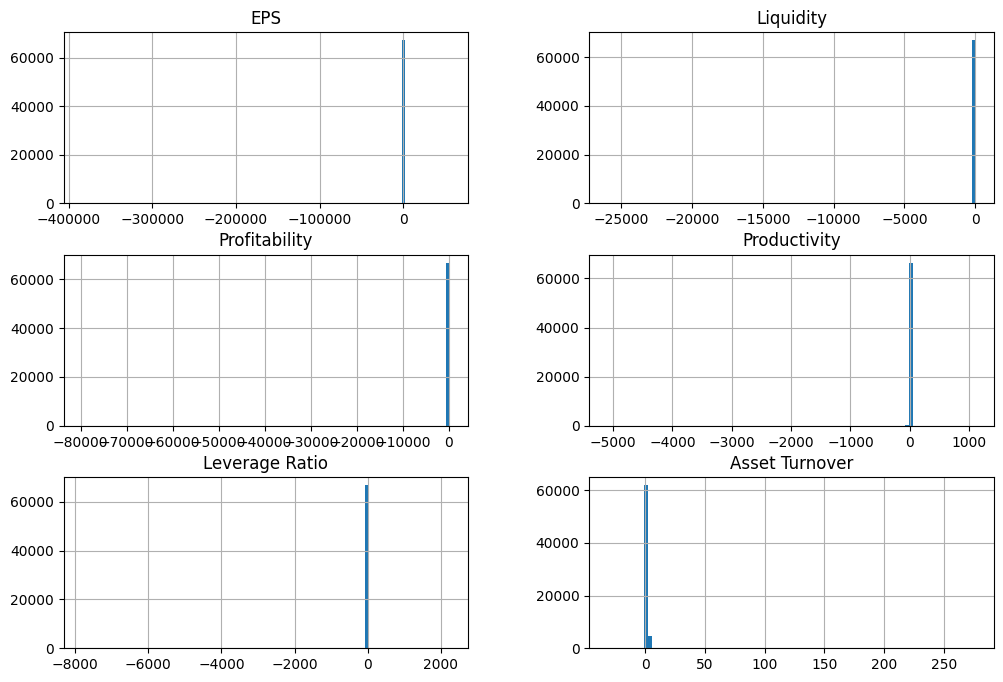

In [13]:
X_train[columns0_5].hist(bins=100, figsize=(12, 8))
plt.show()

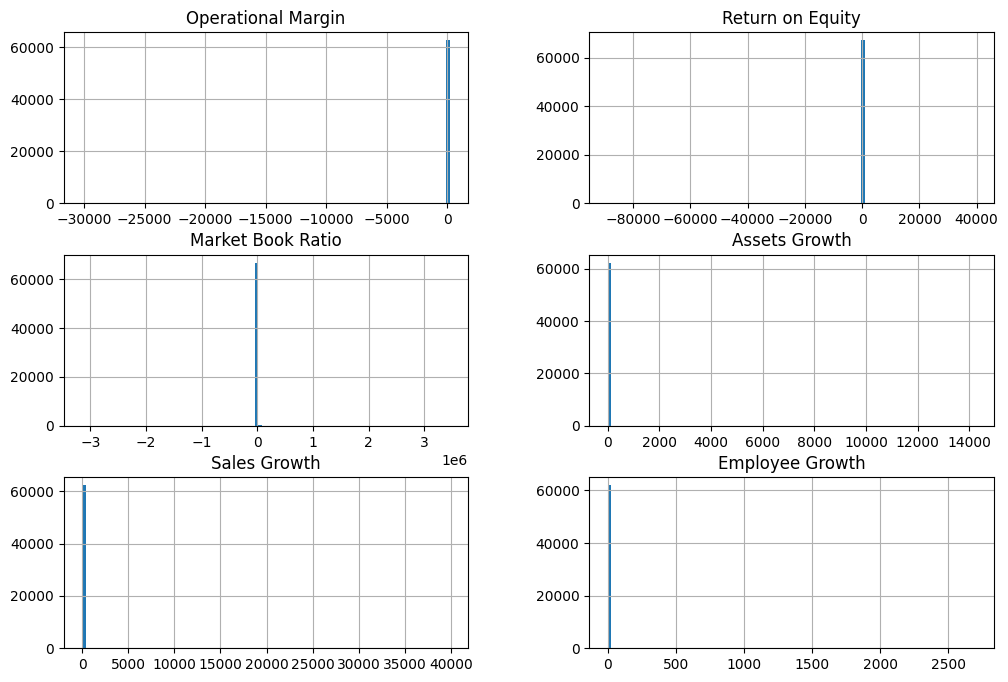

In [14]:
X_train[columns6_12].hist(bins=100, figsize=(12, 8))
plt.show()

Histograms and descriptive statistics (attribute minimum and maximum values) indicate high skewed data 

In [15]:
X_train.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,67096.000000,66922.000000,66922.000000,66922.000000,67082.000000,66922.000000,63011.000000,67093.000000,6.706700e+04,62251.000000,62251.000000,62037.000000
mean,-15.315253,-2.346371,-29.737309,-1.234733,0.617810,1.053874,-7.727776,-2.078204,3.886545e+02,1.382011,1.661798,0.376532
std,2272.429005,115.681884,690.211416,38.702848,39.209752,2.224754,203.411536,401.131962,2.806416e+04,82.345595,165.177703,16.208203
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.387337,-0.030000,-0.080000,1.121000e+01,-0.052541,-0.033845,-0.048018
50%,0.320430,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.835000e+01,0.051549,0.059465,0.017058
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.412100e+02,0.192446,0.203104,0.130757
max,55339.000000,1.000000,140.580000,1102.000000,2238.567394,276.380000,193.140000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000


Resampling Dataset

In [16]:
# Data resampling due to high imbalance in Label examples of dataset
# Create Resampling pipeline to handle oversampling and subsequently undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

over_sampler = SMOTE(sampling_strategy=0.4)
under_sampler = RandomUnderSampler(sampling_strategy=0.8)

resampling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('over', over_sampler),
    ('under', under_sampler)
])

In [17]:
# Resample the dataset
X_train_res, y_train_res = resampling_pipeline.fit_resample(X_train, y_train)

In [18]:
# Checking class distribution of resampled data
from collections import Counter
counter = Counter(y_train_res)
print(counter)

Counter({0: 33347, 1: 26678})


In [19]:
X_res_df = pd.DataFrame(X_train_res, columns=X_train.columns)
X_res_df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
count,60025.000000,60025.000000,60025.000000,60025.000000,60025.000000,60025.000000,60025.000000,60025.000000,6.002500e+04,60025.000000,60025.000000,60025.000000
mean,-74.348700,-1.259233,-18.998824,-0.970973,0.645052,1.249548,-5.210980,-8.298607,1.590017e+02,0.528655,1.659853,0.378359
std,3161.973708,45.867763,505.317192,29.170873,37.830840,2.077730,144.602676,179.588585,1.842804e+04,43.693605,165.564751,14.374166
min,-384000.000000,-6323.000000,-56186.000000,-4595.000000,-7811.000000,-0.490000,-15265.300000,-14360.510000,-3.151500e+06,-1.000000,-6.487889,-1.000000
25%,-0.860000,-0.096694,-1.490000,-0.250000,0.000000,0.510000,-0.236629,-0.747845,3.323312e-01,-0.181224,-0.123439,-0.123250
50%,-0.120000,0.090000,-0.240000,-0.030000,0.303402,1.010000,-0.010000,-0.095462,1.845000e+01,0.001840,0.033330,0.000000
75%,0.640000,0.290000,0.150000,0.076694,1.098061,1.660000,0.080000,0.050000,1.133700e+02,0.141889,0.178433,0.101102
max,55339.000000,1.000000,5.740000,35.920000,2167.000000,276.380000,10.820000,11228.850000,1.020718e+06,10173.720000,39850.000000,2699.000000


Data cleaning and Transformation

The data cleaning and tranformations employed involve filling in missing values with the median values of attributes; the low range in the across the quartiles of feature attributes prompted the use of median attribute values, Clipping the long tails of negatively skewed distributions, performing log transforms to reduce effect of outliers and scaling all feature attrbutes

In [20]:
# Creating custom transformer to perform log transformations to mitigate skewness in data
from sklearn.preprocessing import StandardScaler, FunctionTransformer
log_transform = FunctionTransformer(np.log1p)


In [21]:
# Searching for adequate lower limit to clip high negatively skewed data in order to compute log transformations
np.quantile(X_res_df['Profitability'], 0.35)

-0.8187229794523868

In [22]:
# Creating custom transformer to perform clipping on highly skewed dataset
from sklearn.base import TransformerMixin

class ColumnClipper(TransformerMixin):
    def __init__(self):
        self.column_min = None
        self.column_max = None

    def fit(self, X, y=None):
        self.column_min = np.quantile(X, 0.35, axis=0)
        #self.column_max = np.quantile(X, 0.75, axis=0)
        return self

    def transform(self, X):
        return np.clip(X, self.column_min, self.column_max)

clipper = ColumnClipper()

In [23]:
# Create Pipeline to handle data cleaning and transformation
from sklearn.pipeline import Pipeline

prep_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('att_clipper', clipper),
    ('log_transformer', log_transform),
    ('std_scaler', StandardScaler())
])

In [24]:
# Fit and transform training set using the data preparation pipeline
X_train_prepared = prep_pipeline.fit_transform(X_train_res)

In [25]:
X_train_prepared[:2]

array([[ 0.62036523, -0.49130419,  0.79716832,  1.10411317,  0.29320089,
        -0.838324  ,  1.24270041,  0.4448696 ,  1.44712465,  0.02579297,
        -0.13356684,  0.40316721],
       [-0.13217356, -0.88828592, -1.22815315, -1.00825662, -0.6918729 ,
         0.8661865 , -0.93140971, -0.07146843, -0.91716566,  8.95611154,
         5.11114175, -0.08032315]])

## Model Selection and Training

#### Developing baseline models using Logistic regression and Random Forest Classifier Algorithms

Logistic Regression

In [26]:
# Training a logistic regression on dataset
log_regression = LogisticRegression(random_state=23)
log_regression.fit(X_train_prepared, y_train_res)

LogisticRegression(random_state=23)

In [27]:
# Compute logistic regression predictions
log_predictions = cross_val_predict(log_regression, X_train_prepared, y_train_res, cv=3)

In [28]:
confusion_matrix(y_train_res, log_predictions)

array([[27946,  5401],
       [ 4042, 22636]], dtype=int64)

In [29]:
# Compute logistic regression precision and recall
# Regarding the Precision-Recall tradeoff, recall is my preferred performance metric. Although the ROC_AUC  is the metric the models will be evaluated on 
log_precision = precision_score(y_train_res, log_predictions)
log_recall = recall_score(y_train_res, log_predictions)

In [30]:
print(f'Log precision: {log_precision} \nLog Recall: {log_recall}')

Log precision: 0.8073617006099083 
Log Recall: 0.8484893920083965


In [31]:
# Compute Area under the ROC; The evaluating performance metric 
from sklearn.metrics import roc_auc_score
y_scores_log = log_regression.decision_function(X_train_prepared)
roc_auc_score(y_train_res, y_scores_log)

0.9123955261257646

Random Forest

In [32]:
forest_clf = RandomForestClassifier(random_state=23)
forest_clf.fit(X_train_prepared, y_train_res)

RandomForestClassifier(random_state=23)

In [33]:
forest_predictions = cross_val_predict(forest_clf, X_train_prepared, y_train_res, cv=3)

In [34]:
confusion_matrix(y_train_res, forest_predictions)

array([[32040,  1307],
       [  366, 26312]], dtype=int64)

In [35]:
# Compute Random forest precision and recall
forest_precision = precision_score(y_train_res, forest_predictions)
forest_recall = recall_score(y_train_res, forest_predictions)

In [36]:
print(f'Random Forest precision: {forest_precision} \nRandom Forest Recall: {forest_recall}')

Random Forest precision: 0.9526775046163872 
Random Forest Recall: 0.986280830646975


In [37]:
# Compute Area under the ROC; The evaluating performance metric 
y_probas_forest = forest_clf.predict_proba(X_train_prepared)
y_scores_forest = y_probas_forest[:, 1]
roc_auc_score(y_train_res, y_scores_forest)

0.999952765261737

Fine tuning models

In [38]:
# Defining hyperparameters grid for the Logistic regression and Random forests models
log_params = [
    {'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'C': [0.5, 1.0, 1.5], 'max_iter': [1000]},
    {'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cholesky', 'saga'], 'C': [0.5, 1.0, 1.5], 'max_iter': [1000]}
]

forest_params = [
    {'criterion': ['gini', 'entropy', 'log_loss'], 'bootstrap': [True, False], 'max_features': ['sqrt', 'log2']}
]

In [39]:
# Instantiate GridSeachCv objects for baseline models
from sklearn.model_selection import GridSearchCV
log_grid_search = GridSearchCV(log_regression, log_params, cv=5, scoring='roc_auc', return_train_score=True)

forest_grid_search = GridSearchCV(forest_clf, forest_params, cv=5, scoring='roc_auc', return_train_score=True)

In [61]:
# Run original training + val set through data preparation pipeline; Not resampling
X_train_prep = prep_pipeline.fit_transform(X_train_val)

In [62]:
# Fine tune logistic regression model on original training set
log_grid_search.fit(X_train_prep, y_train_val)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=23),
             param_grid=[{'C': [0.5, 1.0, 1.5], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.5, 1.0, 1.5], 'max_iter': [1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cholesky', 'saga']}],
             return_train_score=True, scoring='roc_auc')

In [63]:
log_grid_search.best_params_

{'C': 0.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [64]:
log_cv_res = log_grid_search.cv_results_
for mean_roc_auc, params in zip(log_cv_res["mean_test_score"], log_cv_res["params"]):
    print(mean_roc_auc, params)

0.8762932200201856 {'C': 0.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
0.8763135263366995 {'C': 0.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
0.8765837666907215 {'C': 0.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.8765264588337848 {'C': 0.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
0.8762660018888596 {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
0.876292926547908 {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
0.8764368625535484 {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.876388233717383 {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
0.876255120694983 {'C': 1.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
0.8762897346653122 {'C': 1.5, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
0.8763750822537693 {'C': 1.5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.8763532479227649 {'C': 1.5, 'max_iter': 1000, 'penalty': '

In [65]:
# fine tune random forest classifier on original training set  
forest_grid_search.fit(X_train_prep, y_train_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23),
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_features': ['sqrt', 'log2']}],
             return_train_score=True, scoring='roc_auc')

In [66]:
forest_grid_search.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}

In [67]:
forest_cv_res = forest_grid_search.cv_results_
for mean_roc_auc, params in zip(forest_cv_res["mean_test_score"], forest_cv_res["params"]):
    print(mean_roc_auc, params)

0.800176169724548 {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
0.800176169724548 {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2'}
0.7981081722053631 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
0.7981081722053631 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}
0.7981081722053631 {'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7981081722053631 {'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'log2'}
0.7563090684678181 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
0.7563090684678181 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2'}
0.7513899000386404 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}
0.7513899000386404 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}
0.7513899000386404 {'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7513899000386404 {'bootstrap': False, 'criterio

In [68]:
# Selecting final model
final_model = log_grid_search.best_estimator_

### Model Evaluation and Testing

The ROC_AUC metric is used with binary classifiers, it measures the Area under the Reciever operator characteristic curve which plots the True positve rate (Recall) against the False positive rate (FPR). I chose this performance metric because it takes into account the Recall as well as the FPR; the Recall measures the ratio of correct positive predictions to overall positive instances, in other words I care most about cases of bankruptcy (positve predictions) which are classified as non-bankrupt. Also the False Positive Rate computes the ratio of non-bankrupt instances classified as bankrupt

In [69]:
# Prepare test set for evaluation
X_test_prep = prep_pipeline.transform(X_test)

In [70]:
# Evaluating final model on test set using cross validation
model_roc_auc = cross_val_score(final_model, X_test_prep, y_test, cv=3, scoring='roc_auc')

In [71]:
model_roc_auc

array([0.85284879, 0.87754549, 0.85318062])

In [72]:
from statistics import mean
mean(model_roc_auc)     # Average ROC_AUC score

0.8611916343190905